# Merging volumentric ROI measures and freesurfer surface measures.
- Cortical thickness/volume/aseg/wmparc data generated by "../tab_data/freesurfer_stats2table.sh" from fMRIPrep_20.2.0 freesurfer_6.0.1
- Cerebellar segmetations in both SUIT34 and MDTB10 spaces.
- Uses participants data (../tab_data/PPMI_subjects.list ADNI_subjects.list) as target to join, all NaN values droped;
## Cohorts
- PPMI NC, ADNI2 NC
## Parcellations
- Distreux
- DKT
## Results
- Distreux: ../tab_data/ADNI-PPMI_Des-cere_preped.csv
- DKT:      ../tab_data/ADNI-PPMI_DKT-cere_preped.csv

In [1]:
## Preprocessing of ADNI and PPMI dataset freesurfer outputs
#lib and path
from pathlib import Path
import pandas as pd
import seaborn as sns
data_dir = Path("/codes/tab_data")
adni_list_file = data_dir/'ADNI_subjects.list'
ppmi_list_file = data_dir/'PPMI_subjects.list'
# groups
GROUPS   = ['ADNI', 'PPMI']
n_groups = len(GROUPS)
sub_list_file = [data_dir/(x+'_subjects.list') for x in GROUPS]
sub_list = [pd.read_csv(x, sep='\t', header=0, index_col=0) for x in sub_list_file]

# reading freesurfer results
FS_DIR = data_dir/'freesurfer_output_20.2.0'
group_data={};

# output file
res_file = [data_dir/'ADNI-PPMI_Des-cere_preped.csv', data_dir/'ADNI-PPMI_DKT-cere_preped.csv']
combined_res_file = [data_dir/'freesurfer_out_preped.csv']

files_2_read={'seg': ['aseg_stats.txt', 'wmparc_stats.txt'],
              'Destrieux': {'ct': '.a2009s.thickness.txt','area':'.a2009s.area.txt', 'volume':'.a2009s.volume.txt', 'meancurv':'.a2009s.meancurv.txt'},
              'DKT': {'ct': '.DKTatlas.thickness.txt','area':'.DKTatlas.area.txt', 'volume':'.DKTatlas.volume.txt', 'meancurv':'.DKTatlas.meancurv.txt'}}

for i_group in range(n_groups):
    """
    Loop to gather all the freesurfer outputs for ET/PD/NC group.
    Output: all_data (dataframe).
    """
    print('Reading ' , GROUPS[i_group], ' freesurfer stats data...')
    # raw data path
    raw_data_path = FS_DIR/GROUPS[i_group]
    # segmentation
    subcortical_file = raw_data_path / (files_2_read['seg'][0]); wm_file = raw_data_path / 'wmparc_stats.txt'; 
    # Des parcellation
    lh_Des_ct_file = raw_data_path / ('lh'+files_2_read['Destrieux']['ct']);  rh_Des_ct_file = raw_data_path /  ('rh'+files_2_read['Destrieux']['ct']);
    lh_Des_vol_file = raw_data_path / ('lh'+files_2_read['Destrieux']['volume']); rh_Des_vol_file = raw_data_path / ('rh'+files_2_read['Destrieux']['volume']);
    lh_Des_area_file = raw_data_path / ('lh'+files_2_read['Destrieux']['area']); rh_Des_area_file = raw_data_path / ('rh'+files_2_read['Destrieux']['area']);
    lh_Des_meancurv_file = raw_data_path / ('lh'+files_2_read['Destrieux']['meancurv']); rh_Des_meancurv_file = raw_data_path / ('rh'+files_2_read['Destrieux']['meancurv']);
    # DKT parcellation
    lh_DKT_area_file = raw_data_path / ('lh'+files_2_read['DKT']['area']);       rh_DKT_area_file = raw_data_path / ('rh'+files_2_read['DKT']['area']);
    lh_DKT_ct_file = raw_data_path / ('lh'+files_2_read['DKT']['ct']);        rh_DKT_ct_file = raw_data_path /  ('rh'+files_2_read['DKT']['ct']);
    lh_DKT_vol_file = raw_data_path / ('lh'+files_2_read['DKT']['volume']);       rh_DKT_vol_file = raw_data_path / ('rh'+files_2_read['DKT']['volume']);
    lh_DKT_meancurv_file = raw_data_path / ('lh'+files_2_read['DKT']['meancurv']);       rh_DKT_meancurv_file = raw_data_path / ('rh'+files_2_read['DKT']['meancurv']);
    ## drop_list
    aseg_drop = ["EstimatedTotalIntraCranialVol"]; wm_drop = ["MaskVol", "EstimatedTotalIntraCranialVol", "CerebralWhiteMatterVol", "rhCerebralWhiteMatterVol", "lhCerebralWhiteMatterVol"];
    parc_drop = ["BrainSegVolNotVent", "eTIV"]; 
    ##
    subcortical_tab = pd.read_csv(subcortical_file, sep='\t', header=0, index_col=0); subcortical_tab.drop(aseg_drop, axis=1, inplace=True);
    res = sub_list[i_group].join(subcortical_tab, how='left');
    wm_tab = pd.read_csv(wm_file, sep='\t', header=0, index_col=0); wm_tab.drop(wm_drop, axis=1, inplace=True);
    res1   = res.join(wm_tab, how='left');
    # read Des/DKT parcelation data
    lh_Des_ct_tab = pd.read_csv(lh_Des_ct_file, sep='\t', header=0, index_col=0); lh_Des_ct_tab.drop(parc_drop, axis=1, inplace=True);
    rh_Des_ct_tab = pd.read_csv(rh_Des_ct_file, sep='\t', header=0, index_col=0); rh_Des_ct_tab.drop(parc_drop, axis=1, inplace=True);
    lh_Des_vol_tab = pd.read_csv(lh_Des_vol_file, sep='\t', header=0, index_col=0); lh_Des_vol_tab.drop(parc_drop, axis=1, inplace=True);
    rh_Des_vol_tab = pd.read_csv(rh_Des_vol_file, sep='\t', header=0, index_col=0); rh_Des_vol_tab.drop(parc_drop, axis=1, inplace=True);
    lh_DKT_ct_tab = pd.read_csv(lh_DKT_ct_file, sep='\t', header=0, index_col=0); lh_DKT_ct_tab.drop(parc_drop, axis=1, inplace=True);
    rh_DKT_ct_tab = pd.read_csv(rh_DKT_ct_file, sep='\t', header=0, index_col=0); rh_DKT_ct_tab.drop(parc_drop, axis=1, inplace=True);
    lh_DKT_vol_tab = pd.read_csv(lh_DKT_vol_file, sep='\t', header=0, index_col=0); lh_DKT_vol_tab.drop(parc_drop, axis=1, inplace=True);
    rh_DKT_vol_tab = pd.read_csv(rh_DKT_vol_file, sep='\t', header=0, index_col=0); rh_DKT_vol_tab.drop(parc_drop, axis=1, inplace=True);
    # merge Des/DKT parcelation data
    seg_Des_tab=res1.join(lh_Des_ct_tab, how='left'); seg_Des_tab=seg_Des_tab.join(rh_Des_ct_tab, how='left'); seg_Des_tab=seg_Des_tab.join(lh_Des_vol_tab,how='left'); seg_Des_tab=seg_Des_tab.join(rh_Des_vol_tab,how='left'); 
    seg_DKT_tab=res1.join(lh_DKT_ct_tab, how='left'); seg_DKT_tab=seg_DKT_tab.join(rh_DKT_ct_tab, how='left'); seg_DKT_tab=seg_DKT_tab.join(lh_DKT_vol_tab,how='left'); seg_DKT_tab=seg_DKT_tab.join(rh_DKT_vol_tab,how='left'); 
    # update group
    seg_Des_tab['group']=GROUPS[i_group]; seg_Des_tab=seg_Des_tab.dropna();
    seg_DKT_tab['group']=GROUPS[i_group]; seg_DKT_tab=seg_DKT_tab.dropna();
    # return data
    group_data[GROUPS[i_group]]={'Des': seg_Des_tab, 'DKT':seg_DKT_tab}
all_data = {'Des': pd.concat([group_data['ADNI']['Des'], group_data['PPMI']['Des']]), 'DKT': pd.concat([group_data['ADNI']['DKT'], group_data['PPMI']['DKT']])}
for x in GROUPS:
    print(x , len(group_data[x]['Des']))

Reading  ADNI  freesurfer stats data...
Reading  PPMI  freesurfer stats data...
ADNI 110
PPMI 116


In [2]:
## adding cerebellar measures from SUIT software in both SUIT space and MDTB space.

# read SUIT space label
suit_label_file=data_dir/'atlas'/'Lobules-SUIT.nii.lut'
suit_label_df  =pd.read_csv(suit_label_file, sep=' ', header=None, index_col=None); 
suit_res_files = [data_dir/('res_'+x+'_SUIT34.csv') for x in GROUPS]
suit_res_dfs = [pd.read_csv(x, sep=',', header=None, index_col=None) for x in suit_res_files]
# read MDTB space
MDTB_res_files= [data_dir/('res_'+x+'_MDTB10.csv') for x in GROUPS]
MDTB_res_dfs  = [pd.read_csv(x, sep=',', header=None, index_col=None) for x in MDTB_res_files]
for i_group in range(n_groups):
    suit_res_dfs[i_group].columns=suit_label_df.iloc[:,7]; 
    suit_res_dfs[i_group].index=group_data[GROUPS[i_group]]['Des'].index;
    MDTB_res_dfs[i_group].columns=['MDTB_'+str(x+1) for x in range(10)];
    MDTB_res_dfs[i_group].index=group_data[GROUPS[i_group]]['Des'].index;
suit_merge=pd.concat(suit_res_dfs); MDTB_merge=pd.concat(MDTB_res_dfs);
cereb_merge=suit_merge.join(MDTB_merge, how='left' );
all_data['Des'] = all_data['Des'].join(cereb_merge, how='left'); all_data['Des']=all_data['Des'].dropna();
all_data['DKT'] = all_data['DKT'].join(cereb_merge, how='left'); all_data['DKT']=all_data['DKT'].dropna();

In [3]:
##Fixing all the format problems: 1. All '-' are replaced by '_'; 
for k, v in all_data.items():
    v.index   = [x.replace('-','_') for x in v.index]
    v.columns = [x.replace('-','_') for x in v.columns]
#remove problematic subjects
#all_data=all_data.drop(index='sub_0073'); # only left brain NC
#all_data=all_data.drop(index='sub_0064'); # super large head normal control, NC
#all_data.columns

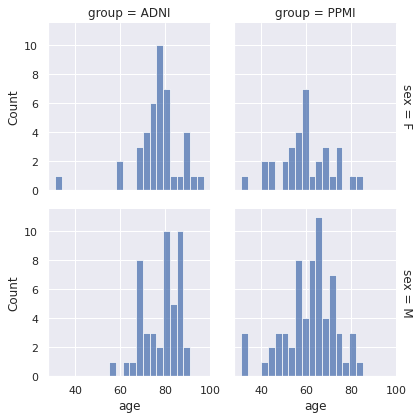

In [4]:
#plot age/sex/diagnosis distributions 2*3
sns.set_theme(style="darkgrid")
sns.displot(
    all_data['Des'], x="age", col="group", row="sex", 
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

In [5]:
#save data
all_data['Des'].to_csv(res_file[0])
all_data['DKT'].to_csv(res_file[1])